# Beispiel für die Zeitfensterung des Cosinus
Das Ausschneiden eines Cosinussignals (gleichbedeutend mit nur endlicher Generierung eines Cosinussignals) entspricht implizit der Multiplikation mit einem Rechteck. Im Frequenzbereich entspricht das wiederum einer Faltung mit der Si-Funktion. Daraus entsteht der Leckeffekt, wenn die Periode der Signalfrequenz nicht mit einem ganzzahligen Vielfachen in die Signallänge passt.  
**Parameter hier:** Abtastfrequenz 8 Hz, Signalfrequenz 1 Hz => Die Fensterlänge muss Vielfaches von 8 sein, damit kein Leckeffekt auftritt.

IntSlider(value=32, continuous_update=False, description='N', min=10)

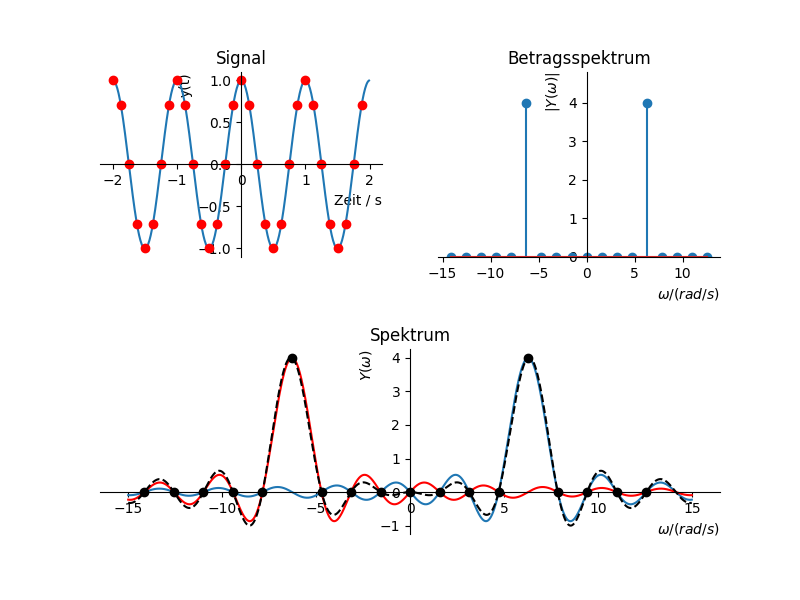

In [8]:
"""
Leckage-Demoscript 
(c) 2014 Stefan Hillenbrand (als m-File)
    Benno Dömer | HS Pforzheim 2025 
"""
import platform
if platform.system() == "Emscripten": # running in JupyterLite
    %pip install -r runtime-requirements.txt

%matplotlib widget 

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets # interaktive Controls wie Slider, Dropdowns etc.

def myplotstyle(ax): # Hilfsfunktion, hübscht den Plot etwas auf
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    

fig = plt.figure(figsize=(8, 6), dpi=100,num=' ')
spec = fig.add_gridspec(ncols=2, nrows=2, hspace=.5)

def plotdata(N):
    f = 1  # Grundfrequenz in Hz
    TA = 1/8  # Abtastperiode in s
    TF = N * TA  # Gesamtlänge des Signals in s
    t = np.arange(-TF/2, TF/2, 0.01)  # Zeitachse für "kontinuierliches" Signal
    y = np.cos(2 * np.pi * f * t)  # Cosinus-Signal

    tA = np.arange(-TF/2, TF/2, TA)  # Abtastzeitpunkte
    yA = np.cos(2 * np.pi * f * tA)  # Abgetastetes Signal

    # "Kontinuierliche" Spektren
    om = np.arange(-15,15,0.01)
    Y1 = N*TA*np.sinc(N*TA/(2*np.pi)*(om-2*np.pi))
    Y2 = N*TA*np.sinc(N*TA/(2*np.pi)*(om+2*np.pi))
    Y=Y1+Y2

    # Berechnen der Abtastwerte des Spektrums
    deltaom = 2*np.pi/TF
    maxomd = np.floor(np.max(om)/deltaom)
    omd = deltaom * np.arange(-maxomd,maxomd)
    Y1d = N*TA*np.sinc(N*TA/(2*np.pi)*(omd-2*np.pi))
    Y2d = N*TA*np.sinc(N*TA/(2*np.pi)*(omd+2*np.pi))
    Yd = Y1d+Y2d;
    
    # clear figure
    fig.clf()

    ax = fig.add_subplot(spec[0,0])
    ax.plot(t, y) # plot window function
    ax.plot(tA, yA, 'ro')  # plot sampled points
    ax.set_xlabel('Zeit / s',loc='right')
    ax.set_ylabel('y(t)',loc='top')
    ax.set_title('Signal')
    myplotstyle(ax)  # apply custom plot style
    # Signal erzeugen

    ax = fig.add_subplot(spec[0,1])
    #ax.plot(om, Y1, 'r') 
    ax.stem(omd, np.abs(Yd)) 
    ax.set_xlabel('$\omega / (rad/s)$', loc='right')
    ax.set_ylabel('$|Y(\omega)|$', loc='top')
    ax.set_title('Betragsspektrum')
    ax.set_ylim([0,N*TA*1.2])
    myplotstyle(ax)


    ax = fig.add_subplot(spec[1,0:2])
    ax.plot(om, Y1) 
    ax.plot(om, Y2,'r') 
    ax.plot(om, Y, '--k')
    ax.plot(omd,Yd,'ok')
    ax.set_xlabel('$\omega / (rad/s)$',loc='right')
    ax.set_ylabel('$Y(\omega)$',loc='top')
    ax.set_title('Spektrum')
    myplotstyle(ax)

    fig.canvas.draw()

    ## Interaktion: 
# Definition von Controls: 
Nslider  = widgets.IntSlider(min=10, max=100, step=1, value=32, continuous_update=False, description='N')

#Verknüpfen mit Callback
out = widgets.interactive_output(plotdata, {'N': Nslider}) 
#Anzeigen
display(Nslider) #, sigtxt, ekcb, out)
plt.show()